# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint as pprint
import json
from pandas.io.json import json_normalize
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# base url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# create queary url
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# create lists for city data  
city_list = []
lat = []
lon = []
max_temp = []
humidity = []
clouds = []
wind_speed = []
country = []
date = []


for city in cities:
    weather_json = requests.get(query_url + city).json()
    try:
        print(f'{str(cities.index(city)) + " " + weather_json["name"]}')
        city_list.append(weather_json["name"])
        lat.append(weather_json["coord"]["lat"])
        lon.append(weather_json["coord"]["lon"])
        max_temp.append(weather_json["main"]["temp_max"])
        humidity.append(weather_json['main']['humidity'])
        clouds.append(weather_json['clouds']['all'])
        wind_speed.append(weather_json['wind']['speed'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
    except KeyError:
        print("City not found. Skipping...")



0 Port Lincoln
1 Ushuaia
2 Cayenne
3 Treinta y Tres
4 Longyearbyen
5 Vao
6 Taltal
7 Punta Arenas
8 Ponta Delgada
9 Lorengau
10 Rikitea
11 Mataura
12 Touros
13 Haines Junction
14 Bluff
15 Yangi Marg`ilon
16 Esperance
17 Freeport
18 Bambous Virieux
19 Nikolskoye
20 Carnarvon
21 Nuuk
22 Port Alfred
23 Honolulu
24 Avarua
25 Tefé
26 Atuona
27 Nānākuli
28 Cap Malheureux
29 Busselton
30 Port Hardy
31 Hasaki
32 Bambanglipuro
33 Yellowknife
34 Butaritari
35 Netrakona
36 Thompson
37 Puerto Ayora
38 Vardø
39 Tafalla
40 Hong Kong
41 Oranjemund
42 Diffa
43 Port Elizabeth
44 Westport
45 Oussouye
46 Karpinsk
47 Chokurdakh
48 Balkhash
49 Lata
50 Lompoc
51 Bredasdorp
52 Sousa
53 Myaundzha
54 Verkhnetulomskiy
55 Kapaa
56 Lebu
City not found. Skipping...
58 Safaga
59 Hithadhoo
City not found. Skipping...
61 Kyshtovka
62 Cape Town
63 Esim
64 Kalianget
65 Narsaq
66 Ponta do Sol
67 San Cristobal
68 Hermanus
69 Normandin
70 East London
71 Shwebo
72 Tuktoyaktuk
73 Severodvinsk
74 Khor
75 Mt. Pleasant
76 Airai

578 Puerto Escondido
579 Fare
580 Leopoldsburg
581 Padang
582 Aki
583 Ulladulla
584 Port Augusta
585 Cortez
586 Lucea
587 Shimoda
588 Thinadhoo
589 Cabedelo
590 Zhangjiakou Shi Xuanhua Qu
City not found. Skipping...
592 Emmett
City not found. Skipping...
594 Augusto Corrêa
595 Half Moon Bay
596 Krabi
597 Livingston
598 ‘Āhuimanu
599 Nokaneng
City not found. Skipping...
601 Fairbanks
602 Hay River
603 Gīdam
604 Muros
605 Bom Jesus
606 Karratha
607 Praia da Vitória
608 Amapá
609 Pavlovka
610 Margate
611 Mil'kovo
612 Jieshi
613 Gao
614 Ponnāni
615 La Ronge
616 Taoudenni
617 Huilong
618 Corinth
619 Cockburn Town


In [4]:
# create weather dictionary and convert it to a dataframe 

weather_dict = {
    "City": city_list,
    "Latitude": lat,
    "Longitude": lon,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date}

weather_df = pd.DataFrame(weather_dict)
weather_df.head()


,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Lincoln,-34.73,135.87,15.71,62,25,4.56,AU,1595989716
1,Ushuaia,-54.80,-68.30,2.00,80,40,9.30,AR,1595989716
2,Cayenne,4.93,-52.33,26.00,88,26,5.59,GF,1595989716
3,Treinta y Tres,-33.23,-54.38,2.34,84,0,2.63,UY,1595989717
4,Longyearbyen,78.22,15.64,11.00,81,75,5.10,SJ,1595989645


In [5]:
# convert to fahrenheit and mph & rename column titles 
temp = ((weather_df["Max Temp"] * 9/5) + 32)
weather_df["Max Temp"] = temp
wind = (weather_df["Wind Speed"] * 2.23694)
weather_df["Wind Speed"] = wind
weather_data = weather_df.rename(columns={"Max Temp": "Max Temp (F)",
                            "Wind Speed": "Wind Speed (mph)",
                            "Humidity": "Humidity %", 
                            "Cloudiness": "Cloudiness %"})
                   
weather_data.head()

,City,Latitude,Longitude,Max Temp (F),Humidity %,Cloudiness %,Wind Speed (mph),Country,Date
0,Port Lincoln,-34.73,135.87,60.278,62,25,10.200446,AU,1595989716
1,Ushuaia,-54.80,-68.30,35.600,80,40,20.803542,AR,1595989716
2,Cayenne,4.93,-52.33,78.800,88,26,12.504495,GF,1595989716
3,Treinta y Tres,-33.23,-54.38,36.212,84,0,5.883152,UY,1595989717
4,Longyearbyen,78.22,15.64,51.800,81,75,11.408394,SJ,1595989645


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_data.to_csv("output_data/weatherdata.csv", index=False, header=True)


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
high_hum = weather_data.loc[weather_data["Humidity %"] >= 100]
high_hum

,City,Latitude,Longitude,Max Temp (F),Humidity %,Cloudiness %,Wind Speed (mph),Country,Date
21,Nuuk,64.18,-51.72,44.600,100,100,1.118470,GL,1595989416
45,Oussouye,12.48,-16.55,75.200,100,40,2.236940,SN,1595989721
54,Verkhnetulomskiy,68.61,31.80,53.600,100,0,2.393526,RU,1595989722
89,George Town,5.41,100.34,82.400,100,20,5.816044,MY,1595989566
127,Örnsköldsvik,63.29,18.72,55.400,100,98,2.236940,SE,1595989697
155,Ancud,-41.87,-73.82,37.994,100,90,3.355410,CL,1595989734
161,Crestview,30.76,-86.57,77.000,100,90,6.845036,US,1595989734
177,Clyde River,70.47,-68.59,37.400,100,90,11.408394,CA,1595989737
205,Dondo,-19.61,34.74,59.000,100,20,4.697574,MZ,1595989740
230,North Vanlaiphai,23.13,93.07,68.558,100,100,0.648713,IN,1595989743


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_data.drop(index=high_hum.index)
clean_city_data.head(25)

,City,Latitude,Longitude,Max Temp (F),Humidity %,Cloudiness %,Wind Speed (mph),Country,Date
0,Port Lincoln,-34.73,135.87,60.278,62,25,10.200446,AU,1595989716
1,Ushuaia,-54.80,-68.30,35.600,80,40,20.803542,AR,1595989716
2,Cayenne,4.93,-52.33,78.800,88,26,12.504495,GF,1595989716
3,Treinta y Tres,-33.23,-54.38,36.212,84,0,5.883152,UY,1595989717
4,Longyearbyen,78.22,15.64,51.800,81,75,11.408394,SJ,1595989645
5,Vao,-22.67,167.48,71.402,79,100,29.080220,NC,1595989717
6,Taltal,-25.40,-70.48,59.144,61,18,3.355410,CL,1595989717
7,Punta Arenas,-53.15,-70.92,39.200,81,75,16.105968,CL,1595989717
8,Ponta Delgada,37.73,-25.67,71.600,94,20,6.934514,PT,1595989717
9,Lorengau,-2.02,147.27,85.982,63,30,8.992499,PG,1595989717


In [9]:
# Extract relevant fields from the data frame

# Export the City_Data into a csv
clean_city_data.to_csv("output_data/cleancitydata.csv", index=False, header=True)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

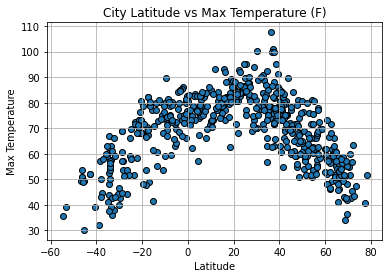

In [10]:
plt.scatter(clean_city_data["Latitude"], clean_city_data["Max Temp (F)"], marker="o", edgecolors="black")
plt.title("City Latitude vs Max Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid()
plt.savefig('output_data/fig1.png')

In [11]:
# this scatterplot shows the relationship between latitude and temperature - it confirms
# the accepted idea that the earth is hottest at the equator, so the closer the latitude is to
# 0, the otter it is. It is currently summer for the northern hemisphere so that could account 
# for warmer temperatures and more outliers in the 20-40 latitudes

## Latitude vs. Humidity Plot

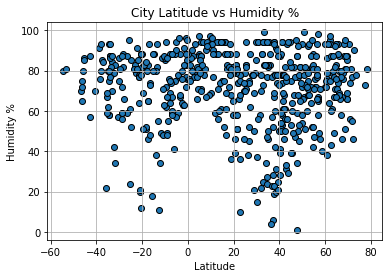

In [12]:
plt.scatter(clean_city_data["Latitude"], clean_city_data["Humidity %"], marker="o", edgecolors="black")
plt.title("City Latitude vs Humidity %")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid()
plt.savefig('output_data/fig2.png')

In [13]:
# comparing the humidity vs latitude tells me that we live in a humid world. There doesn't
# seem to be a correlation with latitude and humidity.

## Latitude vs. Cloudiness Plot

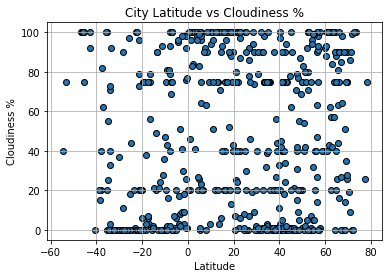

In [14]:
plt.scatter(clean_city_data["Latitude"], clean_city_data["Cloudiness %"], marker="o", edgecolors="black")
plt.title("City Latitude vs Cloudiness %")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid()
plt.savefig('output_data/fig3.png')

In [15]:
# this chart shows there isn't much correlation between cloudiness and latitude. Clouds are
# everywhere. I would be curious to know how this is measured. Is it measured visually by
# humans or some sort of technogology measures it?

## Latitude vs. Wind Speed Plot

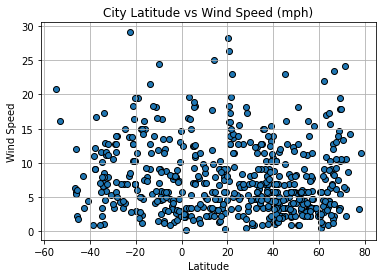

In [16]:
plt.scatter(clean_city_data["Latitude"], clean_city_data["Wind Speed (mph)"], marker="o", edgecolors="black")
plt.title("City Latitude vs Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
plt.savefig('output_data/fig4.png')

In [17]:
# there doesn't seem to be much of a correlation between latitude and wind speed. It seems 
# like wind speed is generally below 15 mph

## Linear Regression

In [18]:
# OPTIONAL: Create a function to create Linear Regression plots
clean_city_data.head()

,City,Latitude,Longitude,Max Temp (F),Humidity %,Cloudiness %,Wind Speed (mph),Country,Date
0,Port Lincoln,-34.73,135.87,60.278,62,25,10.200446,AU,1595989716
1,Ushuaia,-54.80,-68.30,35.600,80,40,20.803542,AR,1595989716
2,Cayenne,4.93,-52.33,78.800,88,26,12.504495,GF,1595989716
3,Treinta y Tres,-33.23,-54.38,36.212,84,0,5.883152,UY,1595989717
4,Longyearbyen,78.22,15.64,51.800,81,75,11.408394,SJ,1595989645


In [19]:
# Create Northern and Southern Hemisphere DataFrames
northern_city_data = clean_city_data.loc[clean_city_data["Latitude"] > 0]
southern_city_data = clean_city_data.loc[clean_city_data["Latitude"] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.47443118483180263


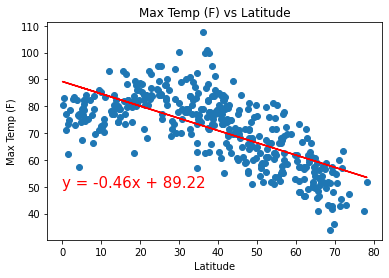

The r-squared is: 0.004891399110124999


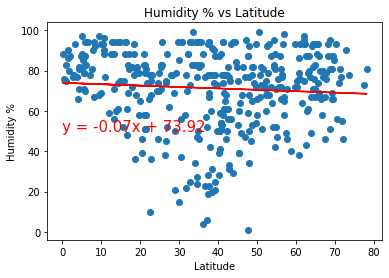

The r-squared is: 0.0039032438238062865


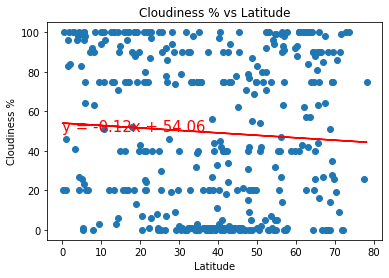

The r-squared is: 0.0036108403387741786


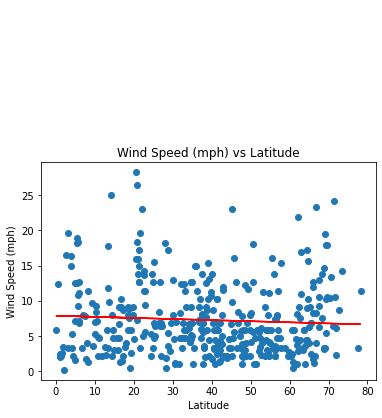

<Figure size 432x288 with 0 Axes>

In [20]:
# using for loop, create scatterplots for northern hemisphere latitude vs 
# temp, humidity, cloudiness, and wind speed

output = "output_data/NHplot{0:02d}.png"
x_axis = northern_city_data["Latitude"]
data_list = [northern_city_data["Max Temp (F)"], northern_city_data["Humidity %"], 
             northern_city_data["Cloudiness %"], northern_city_data["Wind Speed (mph)"]]
data_names = ["Max Temp (F)", "Humidity %", "Cloudiness %", "Wind Speed (mph)"]

for index, value in enumerate(data_list):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, value)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_axis,value)
    plt.plot(x_axis,regress_values,"r-")
    plt.annotate(line_eq,(0,50),fontsize=15,color="red")
    plt.xlabel("Latitude")
    ylab = data_names[index]
    plt.ylabel(ylab)
    plt.title(f"{ylab} vs Latitude")
    print(f"The r-squared is: {rvalue**2}")
    plt.savefig(output.format(index), format='png')
    plt.show()    
    plt.clf()
   


In [21]:
# there seems to be no correlation between wind speed and cloudiness with latitude in the 
# northern hemisphere. The strongeset correlation is between temperature and latitude


The r-squared is: 0.570487293441841


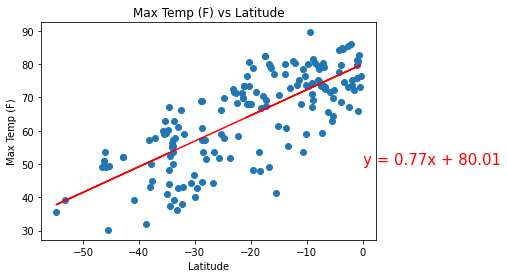

The r-squared is: 0.0013619505190634572


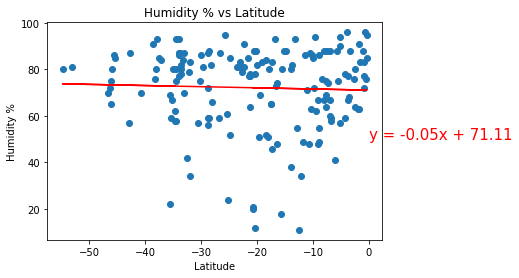

The r-squared is: 0.0021058406606783257


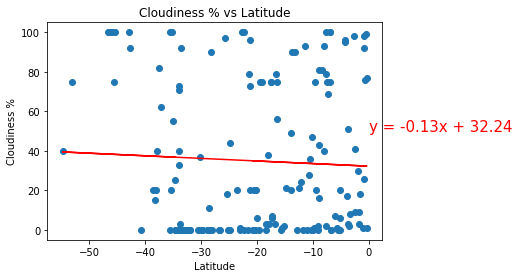

The r-squared is: 0.0069026991099912244


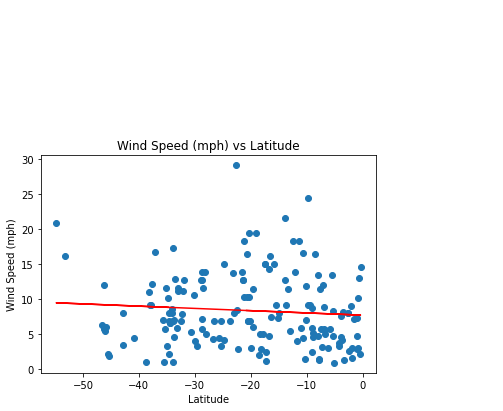

In [24]:
# using for loop, create scatterplots for southern hemisphere latitude vs 
# temp, humidity, cloudiness, and wind speed
# northern_city_data["Max Temp (F)"].max()
output = "output_data/SHplot{0:02d}.png"
x_axis = southern_city_data["Latitude"]
data_list = [southern_city_data["Max Temp (F)"], southern_city_data["Humidity %"], 
             southern_city_data["Cloudiness %"], southern_city_data["Wind Speed (mph)"]]
data_names = ["Max Temp (F)", "Humidity %", "Cloudiness %", "Wind Speed (mph)"]
for index, value in enumerate(data_list):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, value)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_axis,value)
    plt.plot(x_axis,regress_values,"r-")
    plt.annotate(line_eq,(0,50),fontsize=15,color="red")
    plt.xlabel("Latitude")
    ylab = data_names[index]
    plt.title(f"{ylab} vs Latitude")
    plt.ylabel(ylab)
    plt.savefig(output.format(index), format='png')
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [ ]:
# 3 observable trends from data:
# 1. the temperature does increase towards the equator and decrease the further away it is
# 2. the temperature has a steeper slope away from the equator in the southern hemisphere than
# the northern. The northern hemisphere in general also also significantly more datapoints.
# According to Wikipedia, the northern hemisphere accounts for  67.3% of Earth's total land and around 90% of the 
# world's population. Furthermore, the southern hemisphere is 80.9% water. This could account for both the 
# distribution of the data being predominantly located in the northern hemisphere, as well as warmer temperatures
# the further north you look in the northern hemisphere (in addition to the fact that it is summer in the northern
# hemisphere).
# there actually does seem to be a small but notable trend that places closer to the equator are less humid the 
# the further out you get. However, I would imagine a lot of that is also seasonal and dependent upon larger global 
# weather trends in general.

# additional note: I am curious if there are more data points for weather in the northern hemisphere and we just 
# didn't get that many because of the lack of population & land, and therefore cities & notels nearby. Or if there
# are that many fewerer observation points.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression